<img src="https://raw.githubusercontent.com/ml-unison/regresion-logistica/master/imagenes/ml-unison.png" width="250">

# Diferentes técnicas de aprendizaje máquina

**Julio Waissman Vianova**


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.style.use('ggplot')
%matplotlib inline


# Conjuntos de datos de prueba en sklearn que utlizaremos
#----------------------------------------------------------

# Los conjuntos artificiales típicos para probar datos
from sklearn.datasets import make_moons           # En forma de medialunas 
from sklearn.datasets import make_circles         # En forma de círculos
from sklearn.datasets import make_classification  # Como separación lineal


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Los métodos de aprendizaje a utilizar ya provenientes de sklearn
#------------------------------------------------------------------
from sklearn.neighbors import KNeighborsClassifier      # KNN
from sklearn.svm import SVC                             # SVM
from sklearn.tree import DecisionTreeClassifier         # Arbol decisión
from sklearn.ensemble import RandomForestClassifier     # Bósque aleatorios
from sklearn.ensemble import AdaBoostClassifier         # ADA Boost
from sklearn.naive_bayes import GaussianNB              # Naive bayes
from sklearn.linear_model import  LogisticRegression    # Logística con regularización
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis   # Logística con polinomio de orden 2 


## 1. Comparasión de diferentes clasificadores

Muestra para 3 conjuntos de datos artificiales bidimensionales, la forma en que se realiza la clasificación con distintos métodos. Principalmente lo hacemos para poder sacar conclusiones sobre en que situaciones un método puede ser mejor que otros, y que está haciendo internamente.

Codigo obtenido de la documentación de scikit-learn, el cual se puede consultar [aquí](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html).

### 1.1. Generando 3 conjuntos de aprendizaje sintéticos
ara probar como funcionan los diferentes tipos de clasificadores, primero vamos a revisar cual es el tipo de partición del espacio que se espera con cada uno de ellos en 3 casos diferentes. Para los tres casos se va a generar 3 conjuntos de datos sintéticos es dos dimensiones (con el fin de graficar las diferencias).

Estos tres conjuntos son de la siguiente forma:

1. El primer conjunto tiene forma de media luna los datos de una clase respecto a la otra.

2. En el segundo conjunto de datos, los datos de las dos clases están en círculos concéntricos.

3. El tercer caso son datos linealmente separables con ruido.


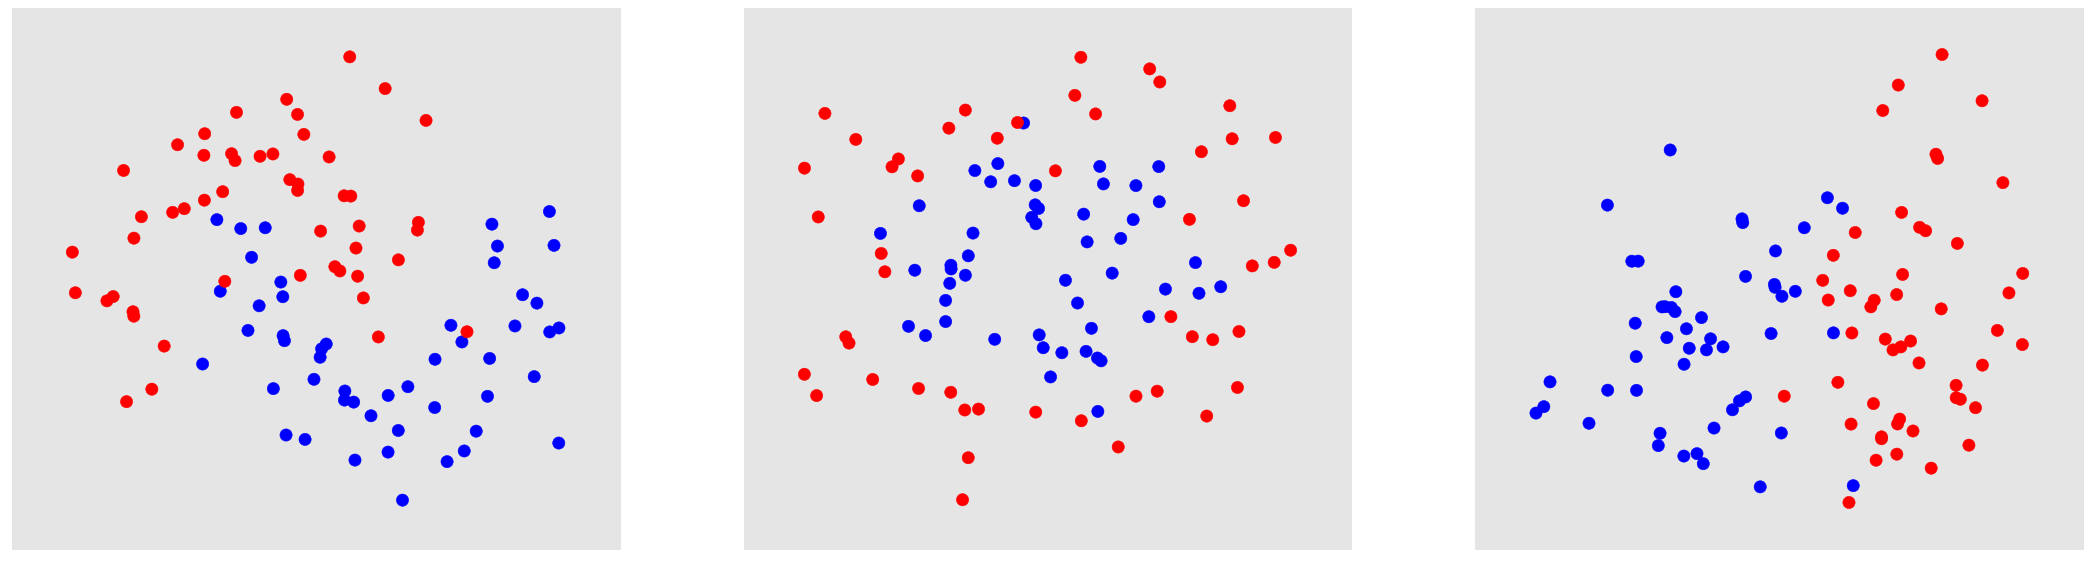

In [4]:
# Datos en forma de media luna
X1, y1 = make_moons(noise=0.3, random_state=0)

# Datos en forma de círculos
X2, y2 = make_circles(noise=0.2, factor=0.5, random_state=1)

# Datos en forma de regresion lineal
X3, y3 = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             random_state=1, n_clusters_per_class=1)
# Le agregamos ruido para hacerlos interesantes
rng = np.random.RandomState(2)
X3 += 2 * rng.uniform(size=X3.shape)

# Los conjuntos de datos irdenados como una lista de pares ordenados
datasets = [(X1, y1), (X2, y2), (X3, y3)]

# Y los grafiacamos para verlos
figure = plt.figure(figsize=(30, 10))
cm_escala = ListedColormap(['#FF0000', '#0000FF'])

for (i, ds) in enumerate(datasets):

    # Selecciona los valores del conjunto de datos y los escala
    X, y = ds
    X = StandardScaler().fit_transform(X)

    # Grafica
    ax = plt.subplot(1, 3, i+1)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=150, cmap=cm_escala)
    ax.set_xlim(X[:, 0].min() - .5, X[:, 0].max() + .5)
    ax.set_ylim(X[:, 1].min() - .5, X[:, 1].max() + .5)
    ax.set_xticks(())
    ax.set_yticks(())
figure.subplots_adjust(left=.02, right=.98)    
plt.show()


### 1.2. Definiendo una la bateria de clasificadores diferentes

En esta sección se va a generar una batería de diferentes objetos clasificador, cada uno proveniente de una técnica diferente. Todos los vamos a guardar en una lista de objetos tipo clasificador de `sklearn`.

Una ventaja de `sklearn` es que todos los objetos clasificador se pueden ajustar sus parámetros en la inicialización, y todos (sean del tipo que sean) utilizan varios métodos, siempre de la misma manera, en particular: `clf.fit` para el aprendizaje y `cls.predict`para el reconocimiento.

In [5]:
clasificadores = [
    KNeighborsClassifier(3),                  # 3 vecinos próximos
    SVC(kernel="linear", C=0.025),            # SVC lineal con C = 0.025
    SVC(gamma=2, C=1),                        # SVC gaussiano con gamma = 2 y C = 1
    DecisionTreeClassifier(max_depth=5),      # Árbol de decisión con máxima profundidad de 5
    RandomForestClassifier(max_depth=5,       # Bósque aleatorios con 10 árboles 
                           n_estimators=10, 
                           max_features=1),
    AdaBoostClassifier(),                     # ADA Boost 
    GaussianNB(),                             # Naive bayes con distribución gaussiana
    LogisticRegression(solver='lbfgs'),       # Logística 
    QuadraticDiscriminantAnalysis()           # Logística con términos cuadráticos 
]

# Solo para fines de graficación
titulos = ["3 vecinos próximos", 
           "SVM lineal", 
           "SVM gaussiano", 
           "Árbol de desición",
           "Boseques aleatórios", 
           "AdaBoost", 
           "Naive Bayes", 
           "Logística",
           "Discriminante cuadrático"]


### 1.3. Generando la clasificación con cada método diferente

Por cada método establecido, y por cada conjunto de datos, vamos a realizar la clasificación con los datos de aprendizaje, y luego vamos a realizar la predicción con un monton de puntos del espacio (en forma de rejilla) con tal de poner de manifiesto cual es el tipo de partición que induce cada uno de los algoritmos propuestos.

Esto se realiza en forma genética, así que es exactamente igual para todos los mñetodos. Por esto se utilizan varios comandos provenientes de `matplotlib`para generar los datos para reconocer en forma de rejilla, y se realizan algunas operaciones no tan comunes para graficar, que se espera no haya problema en entenderlas, al ser solo un problema técnico.





******************************

Base de datos 1
******************************



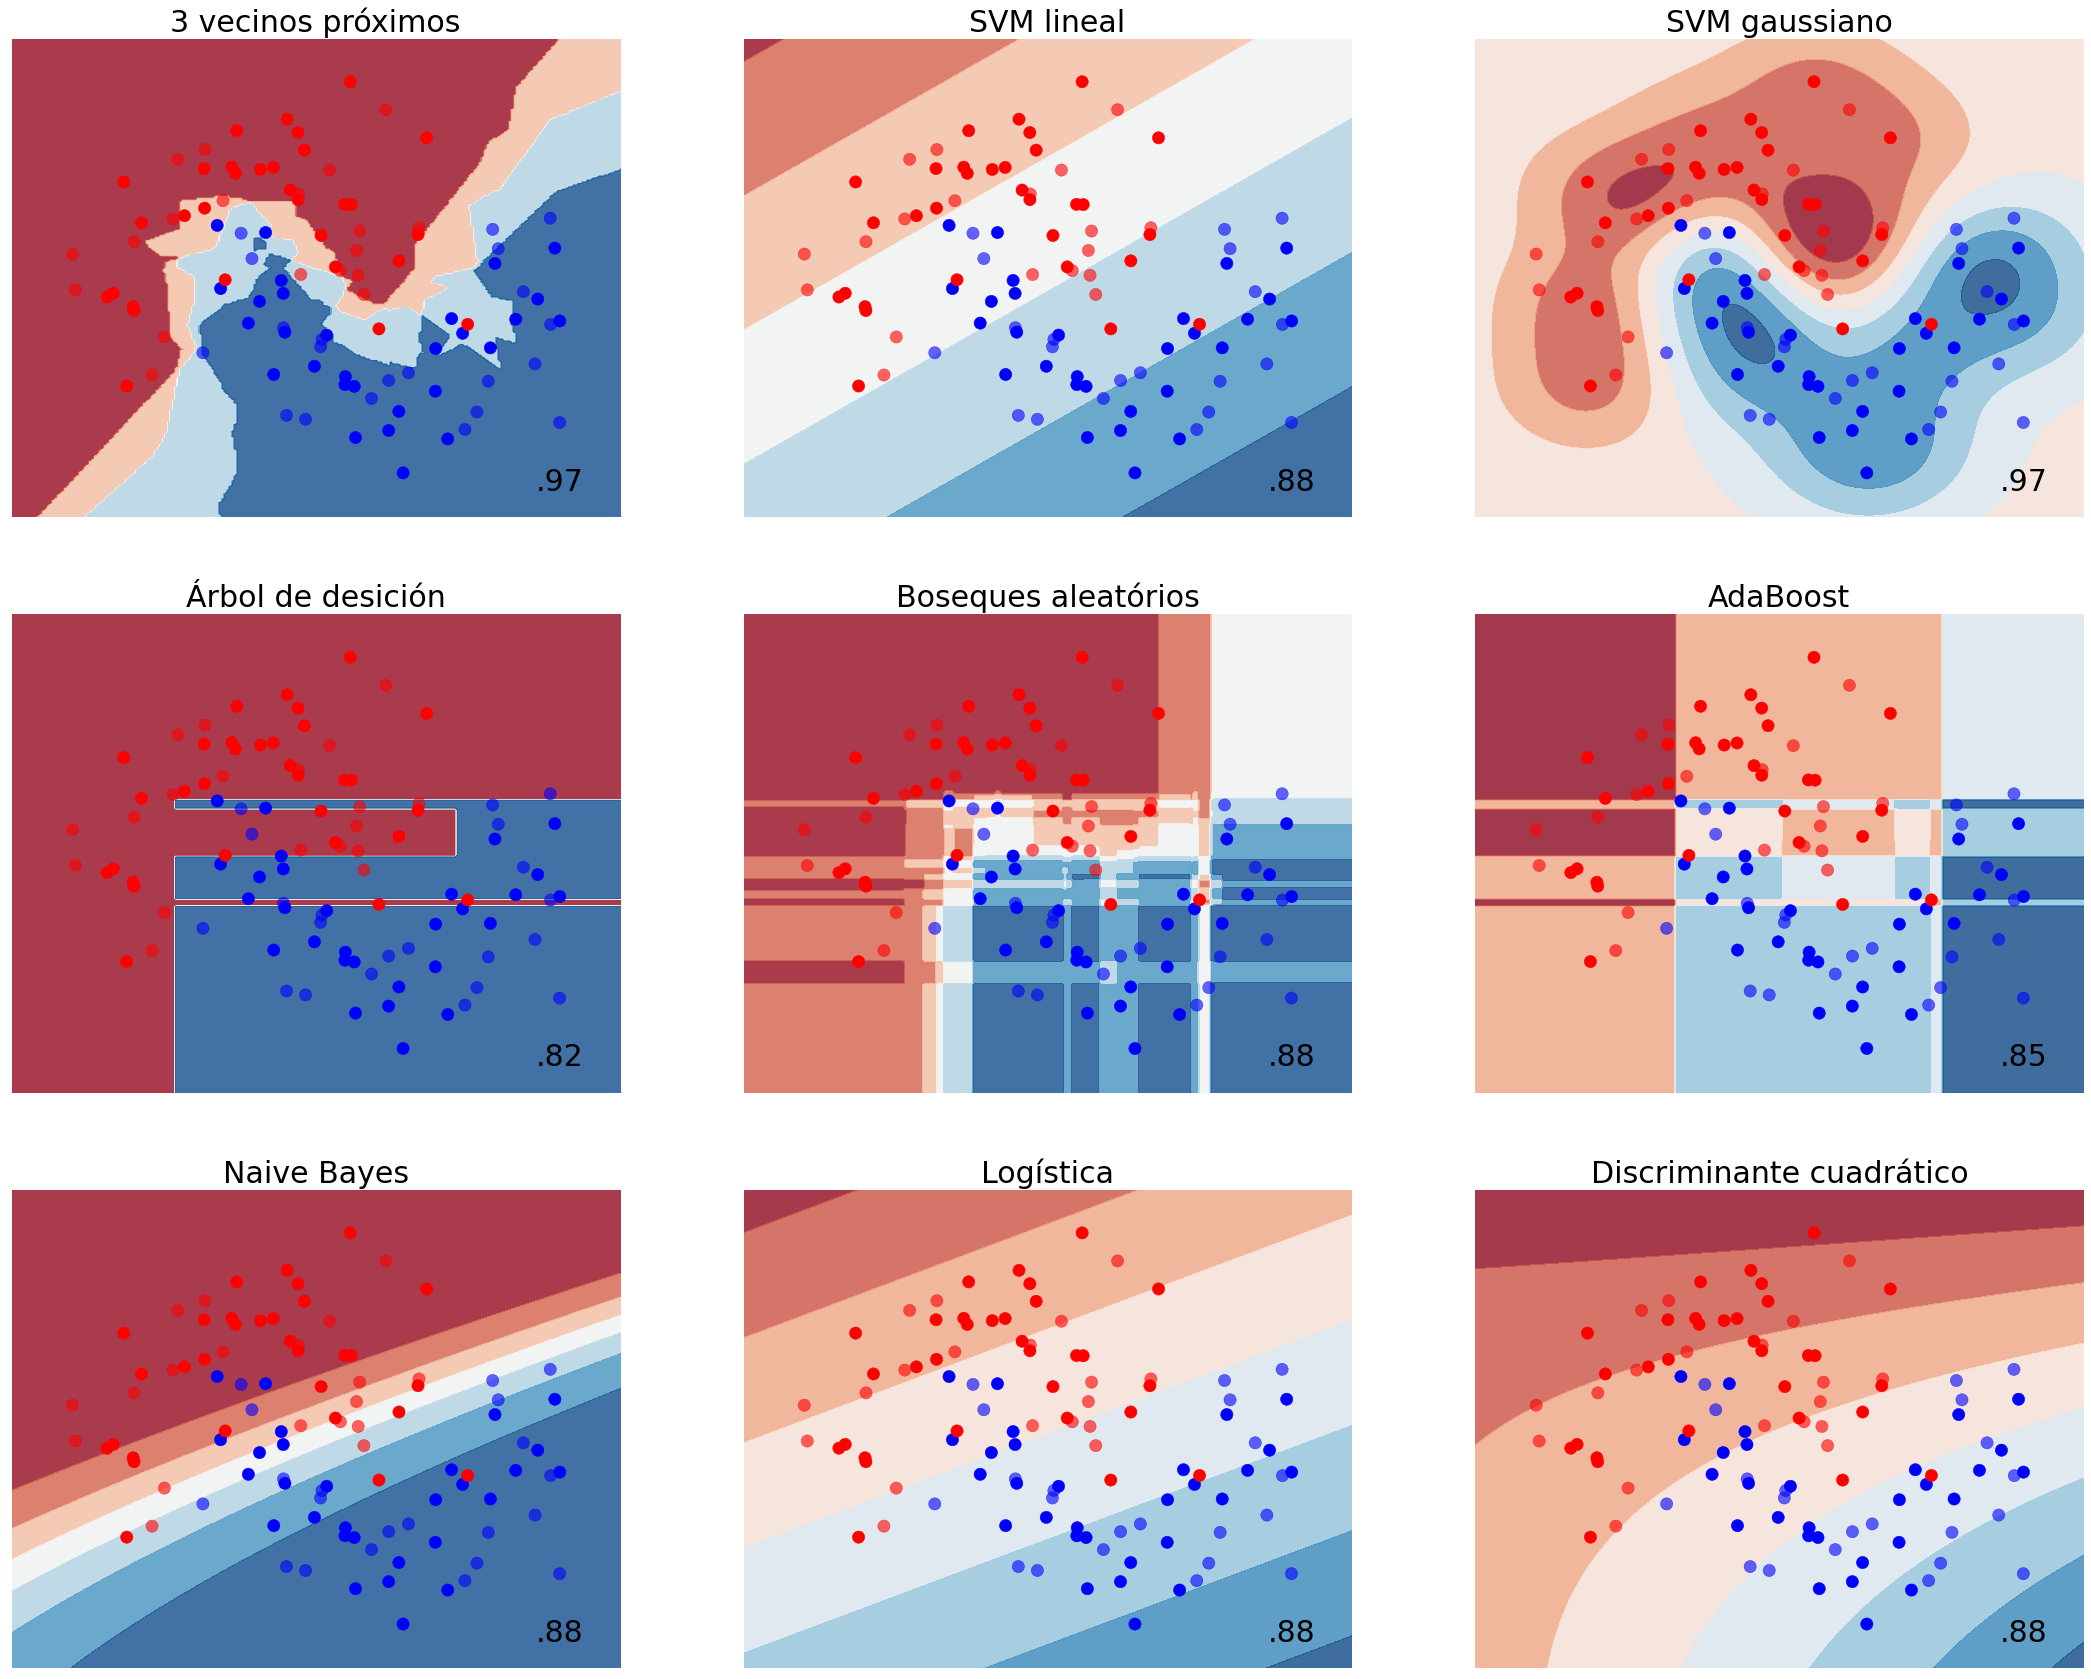





******************************

Base de datos 2
******************************



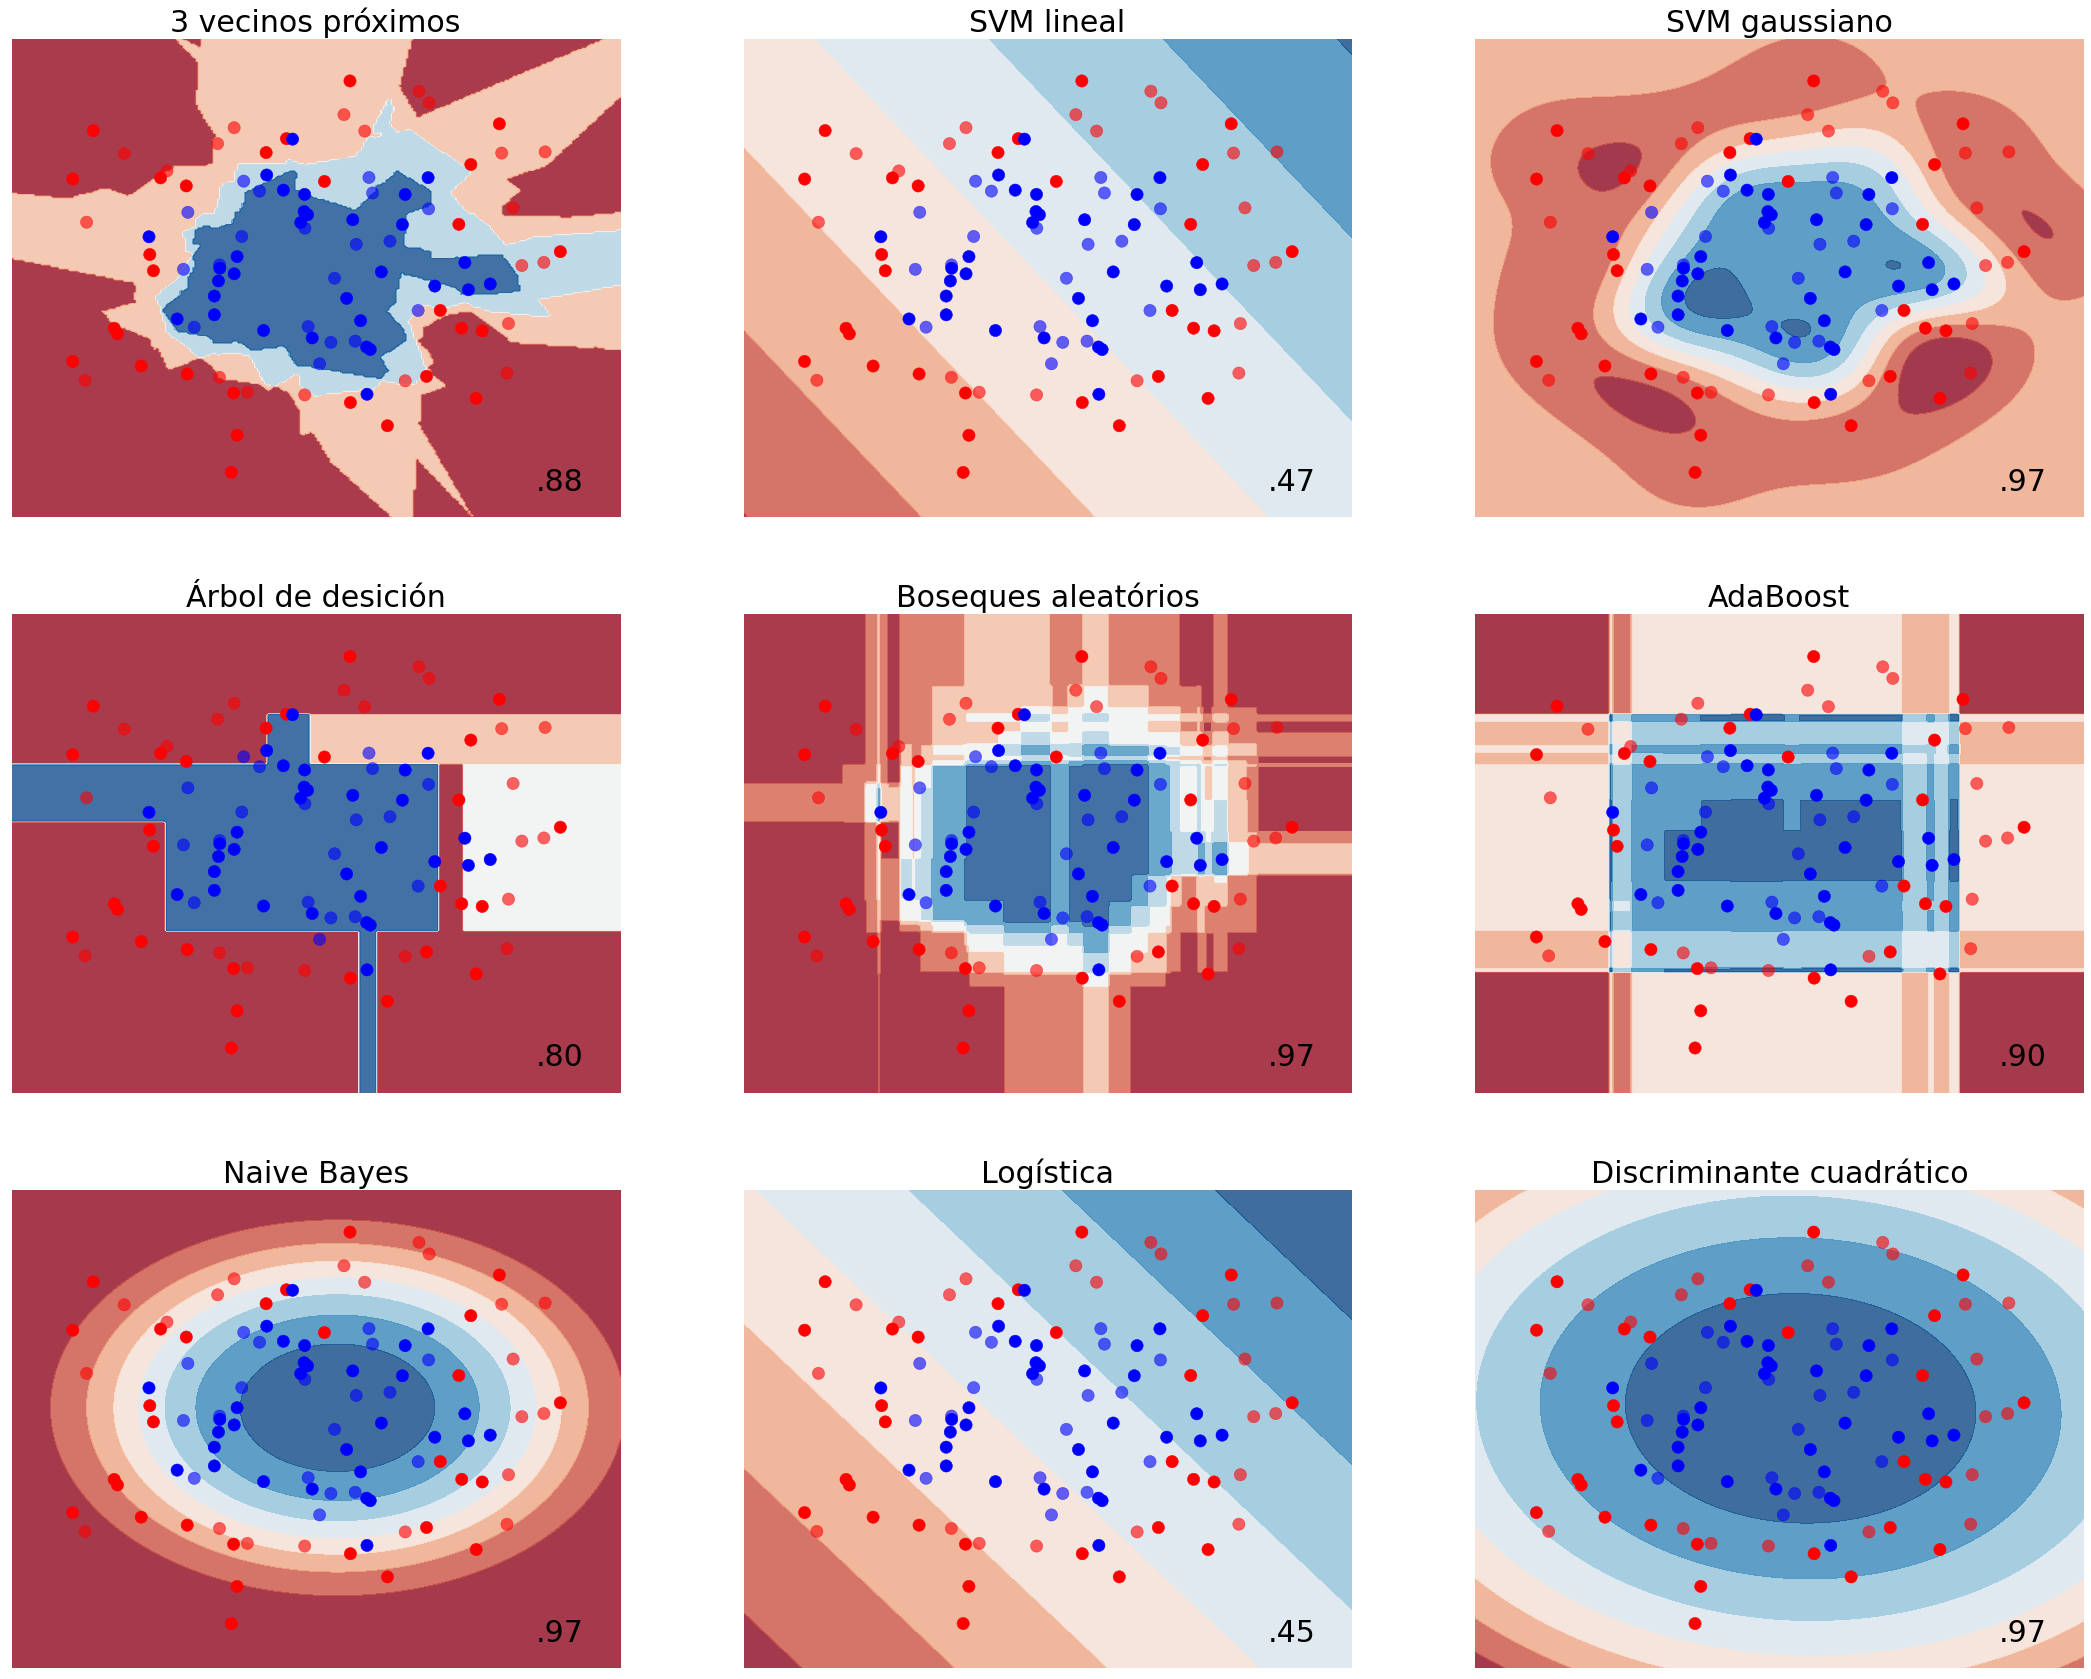





******************************

Base de datos 3
******************************



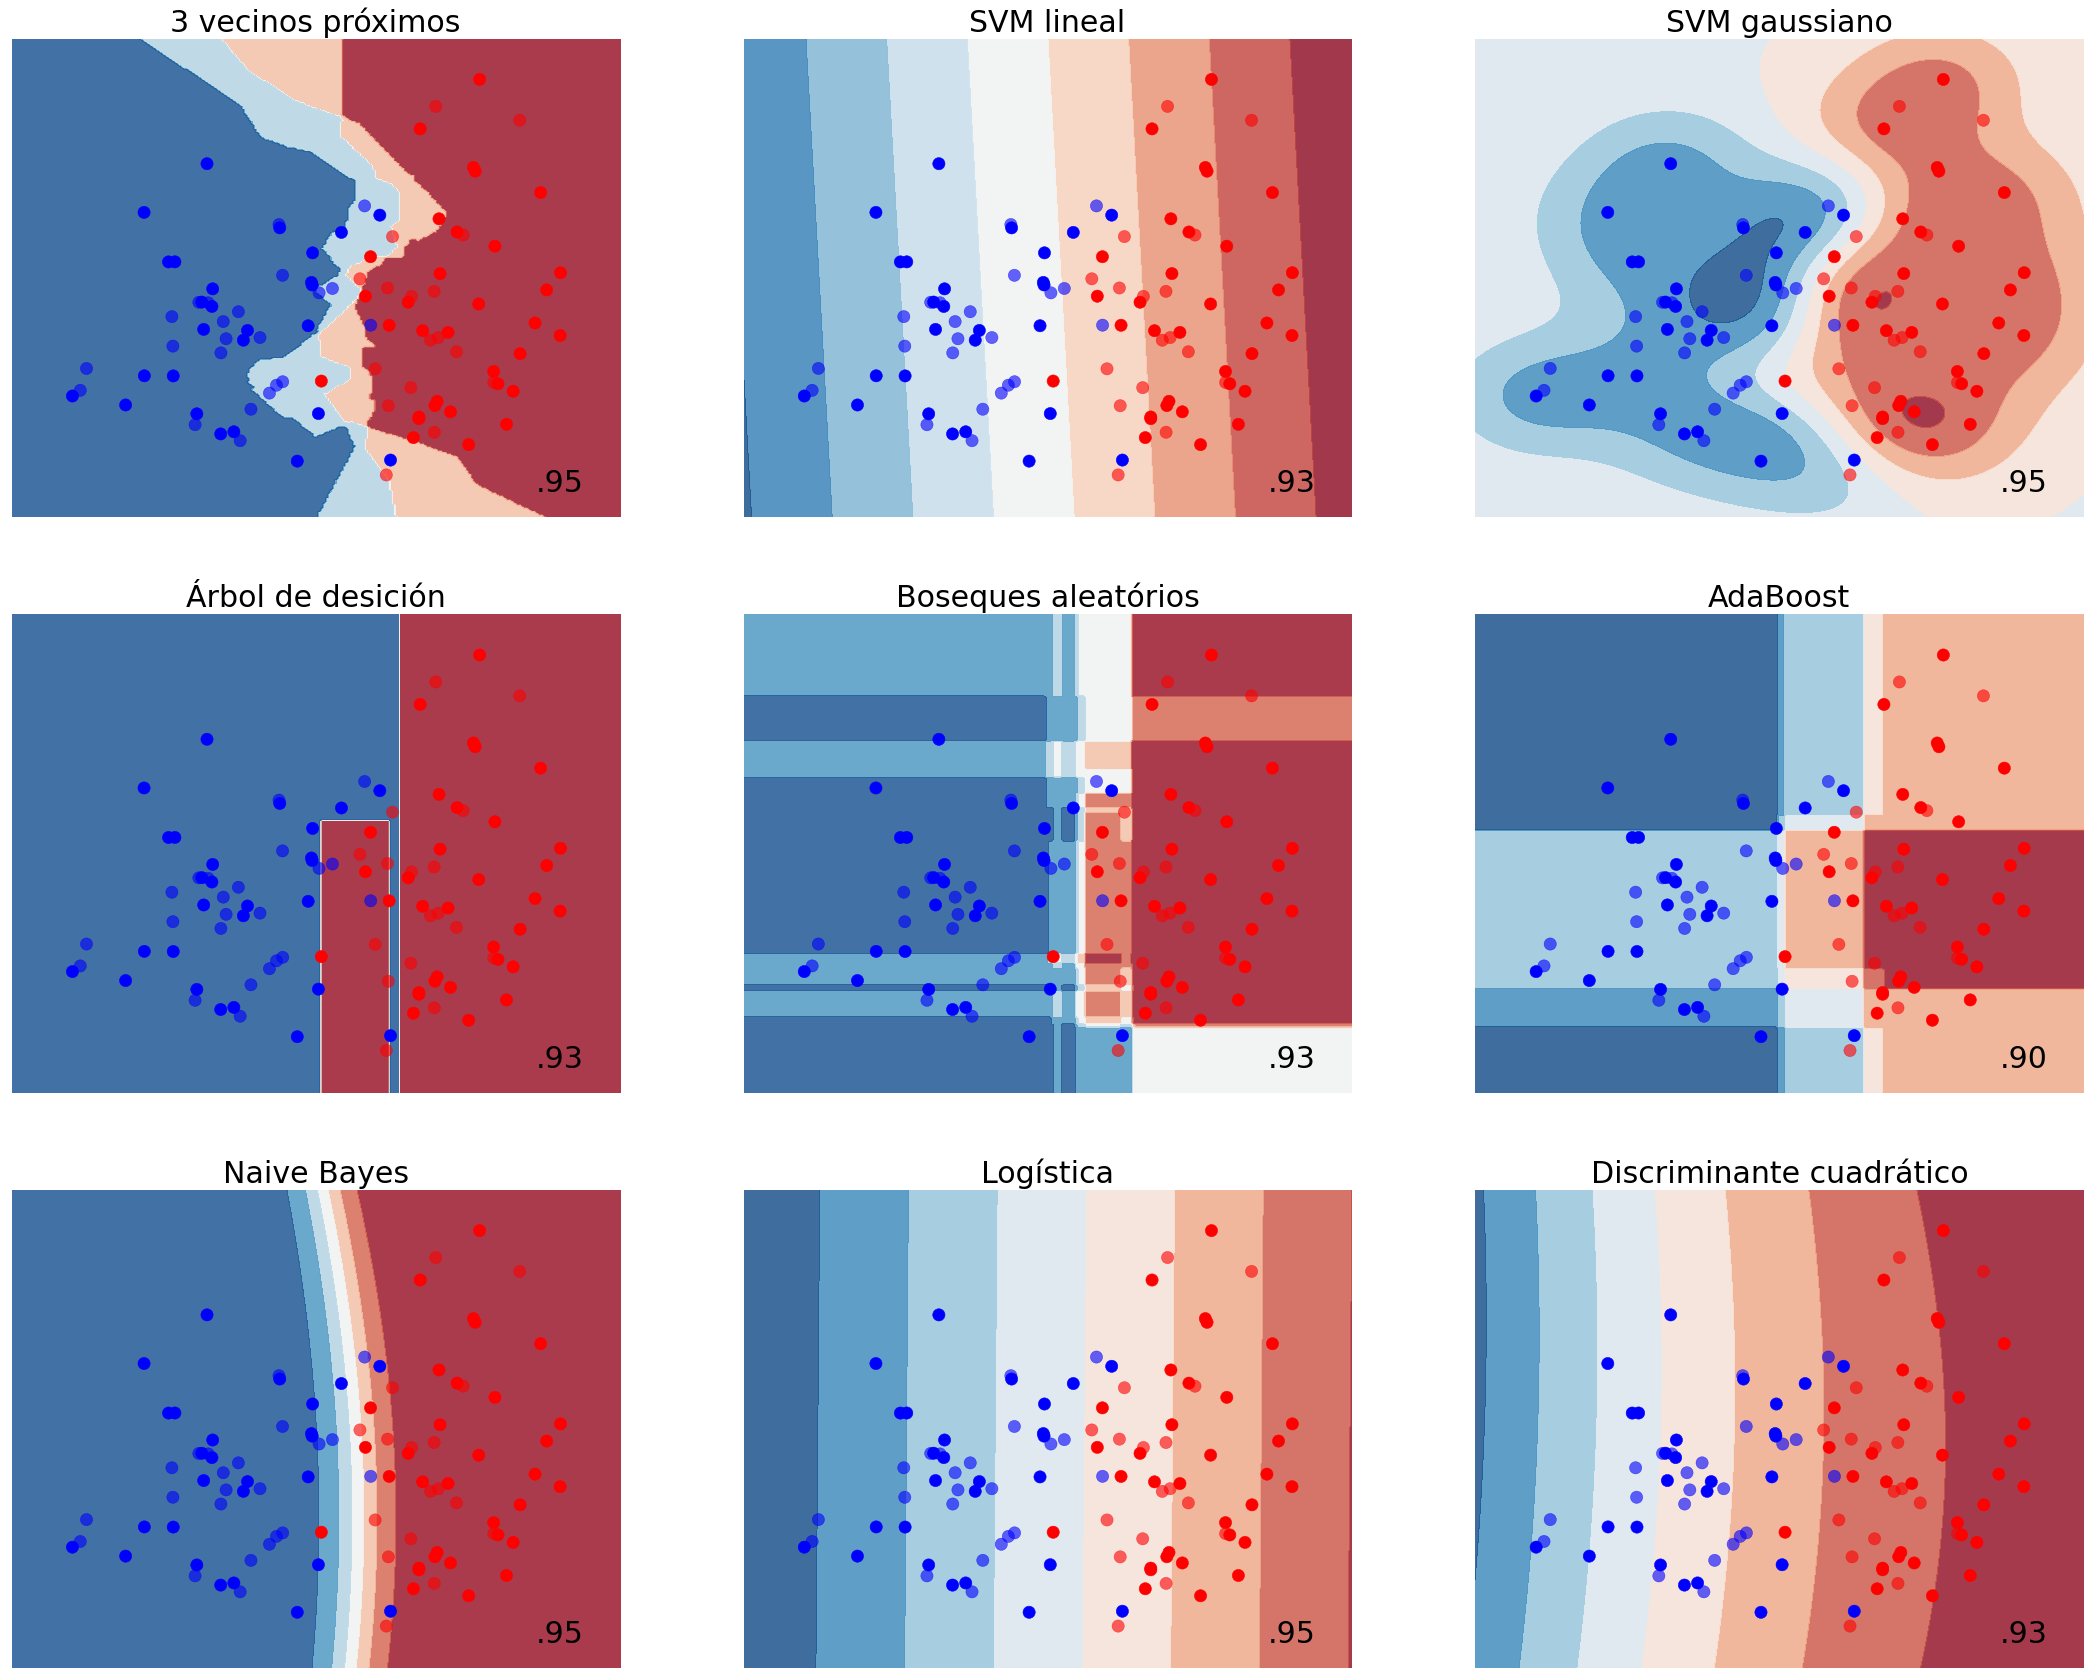

In [6]:
## Vamos a escoger una escala de colores de alto contraste
cm = plt.cm.RdBu
cm_escala = ListedColormap(['#FF0000', '#0000FF'])

for (cual, ds) in enumerate(datasets):
    
    print('\n' * 3)
    print("*"*30 + "\n")
    print("Base de datos " + str(cual + 1))
    print("*"*30 + "\n")
    figure = plt.figure(figsize=(30, 30))


    # Escalar y selecciona valores de entrenamiento y prueba
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    # Meshgrid para pintar las regiones
    xx, yy = np.meshgrid(np.arange(X[:, 0].min() - .5, X[:, 0].max() + .5, 0.02),
                         np.arange(X[:, 1].min() - .5, X[:, 1].max() + .5, 0.02))

    # Por cada clasificador
    for (i, (titulo, clf)) in enumerate(zip(titulos, clasificadores)):
        
        # Escoge el subplot
        ax = plt.subplot(3, 3, i + 1)
        
        # El entrenamiento!!!!
        clf.fit(X_train, y_train)
        
        # Encuentra el error de validación
        score = clf.score(X_test, y_test)

        # Clasifica cada punto en el meshgrid
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = Z.reshape(xx.shape)

        # Asigna un color a cada punto
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Grafica los datos de entrenamiento y prueba
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_escala, s=150)
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_escala, s=150, alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(titulo, size=30)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=30, horizontalalignment='right')

    figure.subplots_adjust(left=.02, right=.98)
    plt.show()



#### Ejercicio 1.

Para cada una de las técnicas, describe en que casos crees que la técnica sería de las mejores técnics a utilizar como método de clasificación (puedes consultar bibbliografía o solo apoyarte en los resultados, pero tiene que ser congruente).

1. **3 vecinos próximos**: Esta técnica funciona mejor cuando los conjuntos de datos no rodean otros conjuntos de datos, por ejemplo si un conjunto de datos esta dentro de un circulo delimitado por una circunferencia de otro conjunto de datos, puede que la técnica de los 3 vecinos próximos no obtenga buenos resultados(Como podemos observar en los resultados de la base de datos 2).

2. **SVM lineal**: Esta técnica funciona mejor cuando los conjuntos de datos se pueden separar mediante rectas(Como podemos observar en la base de datos 3).

3. **SVM gaussiano**: Esta técnica presenta muy buenos resultados para las 3 bases de datos, por lo que podria ser una opcion fiable en la mayoria de ocasiones.

4. **Árbol de desición**: Esta técnica parece funcionar mejor en los datos generados en forma de regresion lineal, en los no tiene un rendimiento tan bajo pero tan poco destacable.

5. **Boseques aleatórios**: Esta técnica presenta buenos resultados en las 3 bases de datos, la forma de los datos que tuvo peor rendimiento fue la de medias lunas.

6. **AdaBoost**: Esta técnica en general presenta resultados decentes para las 3 formas de datos, puede ser una buena opcion para clasificar cualquiera de estas.
 
7. **Naive Bayes**: Esta técnica tiene muy buenos resultados en los datos con formas de regresion lineal y de circulos, en las medias lunas tiene un rendimiento decente, por lo que podria ser una de las mejores opciones para clasificar estas formas. 

8. **Discriminante lineal**: Esta técnica se comporta mejor con los datos en forma de regresion logistica, porque se pueden dividir facilmente mediante lineas rectas.

9. **Discriminante cuadrático**: Esta técnica se comporta muy bien la mayoria de casos, es una de las mejores opciones para clasificar los datos que tengan forma similar a estas bases de datos.